In [ ]:
#✅ Cell 1: Setup
import pandas as pd
import matplotlib.pyplot as plt
import os


In [ ]:
#✅ Cell 2: Define WER & Sample Stats Manually
wer_summary = pd.DataFrame({
    "Language": ["Turkish", "Kurmanci", "Zazaki"],
    "Whisper WER": [0.276, 1.342, 1.048],
    "Wav2Vec2 WER": [0.419, None, None],
    "Samples (GT)": [11352, 3970, 463],
    "Unmatched (Whisper)": [7743, 3967, 461]
})
wer_summary


,Language,Whisper WER,Wav2Vec2 WER,Samples (GT),Unmatched (Whisper)
0,Turkish,0.276,0.419,11352,7743
1,Kurmanci,1.342,NaN,3970,3967
2,Zazaki,1.048,NaN,463,461


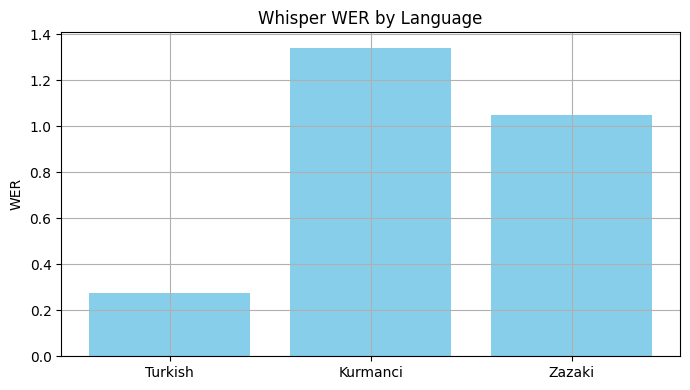

In [ ]:
#✅ Cell 3: Bar Plot – Whisper WER
plt.figure(figsize=(7, 4))
plt.bar(wer_summary["Language"], wer_summary["Whisper WER"], color="skyblue")
plt.title("Whisper WER by Language")
plt.ylabel("WER")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#✅ Cell 4: Load Top Words from Word Mining
def load_top_words(path: Path, column: str, top_n: int = 10):
    df = pd.read_csv(path)
    return df[column].head(top_n).tolist()

PROJECT_ROOT = Path(__file__).resolve().parents[1] if "__file__" in globals() else Path.cwd().parents[1]
FREQ_ROOT = PROJECT_ROOT / "outputs" / "frequencies"

lang_paths = {
    "Turkish": FREQ_ROOT / "turkish",
    "Kurmanci": FREQ_ROOT / "kurmanci",
    "Zazaki": FREQ_ROOT / "zazaki",
}

top_words = {}
for lang, path in lang_paths.items():
    gt_words = load_top_words(path / "gt_word_freq.csv", "word")
    whisper_words = load_top_words(path / "whisper_word_freq.csv", "word")
    top_words[lang] = {"GT": gt_words, "Whisper": whisper_words}

top_words


{'Turkish': {'GT': ['bir',
   'bu',
   've',
   'ne',
   'de',
   'tr',
   '2',
   'da',
   '0',
   'male_masculine'],
  'Whisper': ['bir',
   'bu',
   've',
   'ne',
   'de',
   'da',
   'çok',
   'daha',
   'için',
   'ben']},
 'Kurmanci': {'GT': ['ji',
   'li',
   'bi',
   'xwe',
   'û',
   'min',
   'ez',
   'e',
   'de',
   'di'],
  'Whisper': ['bir',
   've',
   'bu',
   'o',
   'da',
   'kere',
   'şey',
   'zaman',
   'daha',
   'de']},
 'Zazaki': {'GT': ['ra', 'de', 'xo', 'ez', 'ma', 'to', 'mı', 'ke', 'u', 'ro'],
  'Whisper': ['bu', 'o', 've', 'de', 'ne', 'bir', 'ki', 'ez', 'da', 'mi']}}

In [ ]:
#✅ Cell 5: Visual Side-by-Side Top Words
for lang in top_words:
    gt = top_words[lang]["GT"]
    pred = top_words[lang]["Whisper"]
    
    print(f"\n🌍 {lang}")
    print("Ground Truth:", ", ".join(gt))
    print("Whisper:", ", ".join(pred))



🌍 Turkish
Ground Truth: bir, bu, ve, ne, de, tr, 2, da, 0, male_masculine
Whisper: bir, bu, ve, ne, de, da, çok, daha, için, ben

🌍 Kurmanci
Ground Truth: ji, li, bi, xwe, û, min, ez, e, de, di
Whisper: bir, ve, bu, o, da, kere, şey, zaman, daha, de

🌍 Zazaki
Ground Truth: ra, de, xo, ez, ma, to, mı, ke, u, ro
Whisper: bu, o, ve, de, ne, bir, ki, ez, da, mi


In [ ]:
#✅ Cell 6: Token Overlap Score
def token_overlap(list1, list2):
    return len(set(list1) & set(list2)) / len(set(list1)) if list1 else 0

for lang in top_words:
    score = token_overlap(top_words[lang]["GT"], top_words[lang]["Whisper"])
    print(f"{lang} GT vs Whisper overlap: {score:.2f}")


Turkish GT vs Whisper overlap: 0.60
Kurmanci GT vs Whisper overlap: 0.10
Zazaki GT vs Whisper overlap: 0.20
